In [64]:
# Import the much needed stuff for training
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

In [65]:
# Read CSV file for Training the model using Pandas
df_train = pd.read_csv("hands_SIBI_training.csv", header=0)

df_train

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
0,A,633.079380,1031.794727,-1.029254e-06,552.742794,1014.596709,-0.016872,488.761693,950.070965,-0.015831,...,-0.014530,625.414029,841.904812,-0.030691,621.901855,885.472149,-0.008086,634.784594,893.365762,0.015983
1,A,1591.784213,2099.707924,-1.857942e-06,1318.607858,1917.100941,-0.034396,1120.267701,1682.855012,-0.059530,...,-0.074243,1683.593624,1443.143311,-0.114158,1637.900345,1626.554544,-0.080055,1703.259765,1651.284102,-0.043401
2,A,1583.454045,1993.154838,-1.932337e-06,1328.071508,1836.134789,-0.023637,1136.303083,1590.329483,-0.039298,...,-0.075024,1680.113028,1334.217393,-0.118665,1636.022493,1532.326854,-0.082507,1701.786802,1574.371294,-0.043058
3,A,1593.135340,2003.049824,-1.917325e-06,1329.626807,1846.083207,-0.025695,1135.570690,1601.084763,-0.042078,...,-0.071267,1678.341120,1337.785852,-0.110229,1631.677766,1530.720809,-0.074036,1692.048390,1576.065932,-0.036066
4,A,1615.659772,1899.973072,-1.697942e-06,1366.676348,1755.681619,-0.028110,1173.298271,1514.212327,-0.040185,...,-0.053522,1706.582711,1260.215963,-0.096525,1669.381164,1456.343893,-0.064412,1727.129797,1498.052231,-0.027742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,Z,472.966313,1540.549994,1.156611e-06,522.023559,1514.556885,-0.276131,711.459756,1421.978235,-0.379206,...,-0.041158,1253.675699,1319.325686,-0.154479,1103.553176,1493.587255,-0.163301,963.837624,1532.385945,-0.143554
1052,Z,511.085093,1538.953304,1.230672e-06,485.632837,1530.085564,-0.252264,638.235927,1447.455406,-0.371612,...,-0.123394,1241.890192,1443.705082,-0.246548,1078.716993,1598.790646,-0.245476,946.605921,1613.921404,-0.219498
1053,Z,289.586902,1389.938593,1.943169e-07,592.706800,1311.617374,-0.152483,900.285482,1261.919737,-0.125441,...,0.223034,1054.138541,1293.740630,0.159143,914.128363,1380.347967,0.114000,786.959291,1369.079351,0.106502
1054,Z,265.467346,1484.784365,2.655130e-07,447.429001,1383.484006,-0.221616,732.457399,1315.951228,-0.233599,...,0.175156,1110.132456,1363.412261,0.080964,984.978139,1486.548662,0.038428,876.057625,1501.790762,0.041642


In [66]:
# Read CSV file for Validation or Testing the Model using Pandas
df_test = pd.read_csv("hands_SIBI_validation.csv", header=0)

df_test

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
0,A,1610.007216,1784.244035,-1.749235e-06,1369.551107,1709.763939,-0.042585,1148.568022,1496.684943,-0.062479,...,-0.052158,1657.078684,1124.223124,-0.091841,1640.837864,1317.483665,-0.057763,1681.879869,1367.191519,-0.020736
1,A,721.901596,1655.649900,-1.420789e-06,530.846596,1427.740693,-0.034975,442.550361,1126.330376,-0.054130,...,-0.051886,1116.067886,1094.982624,-0.091441,1040.838242,1238.941789,-0.066161,998.332918,1323.050618,-0.035342
2,A,749.511778,1684.732795,-1.402203e-06,563.877583,1453.747034,-0.036049,486.337095,1149.076819,-0.054778,...,-0.049362,1145.679951,1128.144860,-0.089420,1065.986991,1271.077037,-0.065419,1017.943382,1357.578039,-0.034874
3,A,626.763403,1036.431742,-1.010617e-06,557.352796,1013.014567,-0.019210,502.974451,940.376868,-0.019415,...,-0.026157,646.708667,850.894585,-0.045292,638.892889,895.978625,-0.022630,649.126634,910.227203,0.002203
4,A,303.739804,3094.464386,2.659254e-07,373.745911,3178.373840,-0.009913,384.860658,3259.081604,-0.005684,...,0.074704,270.859761,3269.004730,0.101987,289.082896,3289.683472,0.118750,303.885542,3296.251648,0.130978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Z,225.790128,1833.904896,-2.789371e-08,222.669122,1967.997986,-0.246023,430.404808,2049.844986,-0.340677,...,-0.046414,1051.457326,1762.525051,-0.136801,910.432521,1864.261826,-0.133323,791.947807,1792.989178,-0.108027
208,Z,2572.288327,2967.599804,-1.137866e-07,2394.056368,2864.046263,-0.004316,2233.504243,2798.140757,-0.023914,...,-0.079279,2248.028226,2977.749338,-0.090497,2285.416975,3009.534792,-0.083654,2350.825109,2980.246215,-0.078822
209,Z,1742.245886,2565.417858,2.051919e-07,1691.130518,2520.568737,-0.055253,1672.879678,2425.837498,-0.085446,...,-0.039117,1978.539119,2383.158772,-0.081821,1975.439507,2466.163536,-0.087077,1954.306755,2521.870468,-0.081235
210,Z,607.798517,1321.071744,7.056732e-07,662.470937,1287.229657,-0.190705,824.859679,1257.505655,-0.242309,...,0.023399,1208.418965,1214.795113,-0.046823,1095.283389,1289.289713,-0.056086,1015.160561,1262.510061,-0.042613


In [67]:
# Put Categorical using Pandas
df_train["class_type"] = pd.Categorical(df_train["class_type"])
df_train["class_type"] = df_train.class_type.cat.codes

df_test["class_type"] = pd.Categorical(df_test["class_type"])
df_test["class_type"] = df_test.class_type.cat.codes

In [68]:
# Copy Label and Feature for training
y_train = df_train.pop("class_type")
x_train = df_train.copy()

y_test = df_test.pop("class_type")
x_test = df_test.copy()

# Copied Features turn to Array by using NumPy
x_train = np.array(x_train)
x_test = np.array(x_test)

# Normalize the Datasets
x_train, x_test = x_train/255.0, x_test/255.0

In [69]:
# Check Array Shape before transformation
print(x_train.shape)
print(x_test.shape)

# Since the array shape is 1x1, we must turn it into 1x10x1 so we can feed it into the model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Check Array Shape after transformation
print(x_train.shape)
print(x_test.shape)

(1056, 63)
(212, 63)
(1056, 63, 1)
(212, 63, 1)


In [70]:
# Check sample train and test features
print(x_train[0])
print(x_test[7])

[[ 2.483]
 [ 4.046]
 [-0.   ]
 [ 2.168]
 [ 3.979]
 [-0.   ]
 [ 1.917]
 [ 3.726]
 [-0.   ]
 [ 1.785]
 [ 3.51 ]
 [-0.   ]
 [ 1.706]
 [ 3.333]
 [-0.   ]
 [ 2.006]
 [ 3.451]
 [ 0.   ]
 [ 1.888]
 [ 3.332]
 [-0.   ]
 [ 1.971]
 [ 3.553]
 [-0.   ]
 [ 2.048]
 [ 3.638]
 [-0.   ]
 [ 2.176]
 [ 3.398]
 [ 0.   ]
 [ 2.051]
 [ 3.301]
 [-0.   ]
 [ 2.123]
 [ 3.565]
 [-0.   ]
 [ 2.194]
 [ 3.584]
 [-0.   ]
 [ 2.364]
 [ 3.379]
 [ 0.   ]
 [ 2.242]
 [ 3.276]
 [-0.   ]
 [ 2.281]
 [ 3.527]
 [-0.   ]
 [ 2.352]
 [ 3.554]
 [ 0.   ]
 [ 2.559]
 [ 3.385]
 [-0.   ]
 [ 2.453]
 [ 3.302]
 [-0.   ]
 [ 2.439]
 [ 3.472]
 [-0.   ]
 [ 2.489]
 [ 3.503]
 [ 0.   ]]
[[11.362]
 [ 8.714]
 [-0.   ]
 [10.547]
 [ 7.91 ]
 [-0.   ]
 [10.144]
 [ 7.111]
 [ 0.   ]
 [10.096]
 [ 6.262]
 [ 0.   ]
 [10.108]
 [ 5.641]
 [ 0.   ]
 [10.686]
 [ 6.474]
 [ 0.   ]
 [10.615]
 [ 5.83 ]
 [ 0.   ]
 [10.546]
 [ 6.443]
 [ 0.   ]
 [10.569]
 [ 6.712]
 [ 0.   ]
 [11.125]
 [ 6.564]
 [ 0.   ]
 [11.013]
 [ 5.979]
 [ 0.   ]
 [10.872]
 [ 6.715]
 [ 0.   ]
 [10.898]

In [71]:
# Number of classes according standard Alphabets
num_classes = 26

# Using the Keras.Utils to put the label categorically 
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [86]:
# One Dimensional Convolutional Neural Network model, Train will be feed to 1 Dimension Convolutional Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=x_train.shape[1:3]),
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(num_classes, activation='softmax')])

model._name="SIBI_ML_Model"
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "SIBI_ML_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_64 (Conv1D)           (None, 63, 32)            192       
_________________________________________________________________
conv1d_65 (Conv1D)           (None, 63, 32)            5152      
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 31, 32)            0         
_________________________________________________________________
conv1d_66 (Conv1D)           (None, 31, 64)            10304     
_________________________________________________________________
conv1d_67 (Conv1D)           (None, 31, 64)            20544     
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 15, 64)            0         
_________________________________________________________________
conv1d_68 (Conv1D)           (None, 15, 128)         

In [87]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.97) and (logs.get('accuracy')>0.99):
      print("\nReached 97% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [88]:
#Train the Model
history = model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_data=(x_test, y_test), callbacks=[callbacks])

Epoch 1/1000
33/33 [==============================] - 3s 76ms/step - loss: 3.2618 - accuracy: 0.0275 - val_loss: 3.2579 - val_accuracy: 0.0425
Epoch 2/1000
33/33 [==============================] - 2s 55ms/step - loss: 3.2587 - accuracy: 0.0379 - val_loss: 3.2580 - val_accuracy: 0.0377
Epoch 3/1000
33/33 [==============================] - 2s 56ms/step - loss: 3.2526 - accuracy: 0.0379 - val_loss: 3.2384 - val_accuracy: 0.0566
Epoch 4/1000
33/33 [==============================] - 2s 56ms/step - loss: 3.2367 - accuracy: 0.0625 - val_loss: 3.2087 - val_accuracy: 0.0708
Epoch 5/1000
33/33 [==============================] - 2s 55ms/step - loss: 3.1117 - accuracy: 0.0729 - val_loss: 3.0512 - val_accuracy: 0.0660
Epoch 6/1000
33/33 [==============================] - 2s 57ms/step - loss: 2.8641 - accuracy: 0.0729 - val_loss: 2.8479 - val_accuracy: 0.1179
Epoch 7/1000
33/33 [==============================] - 2s 57ms/step - loss: 2.6593 - accuracy: 0.1174 - val_loss: 2.5190 - val_accuracy: 0.1792

Text(0.5, 1.0, 'Training and validation loss')

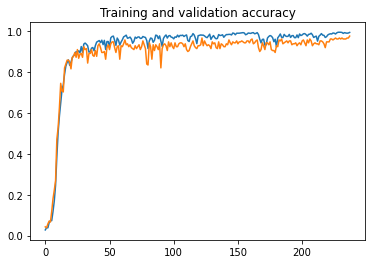

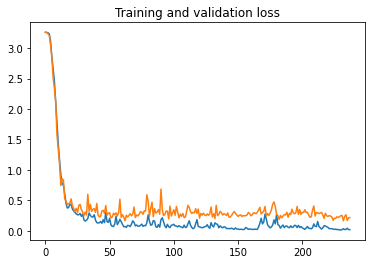

In [89]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [90]:
#Saving the model into H5 system file
save_model = "model_SIBI.h5"
model.save(save_model)
print("Model Saved into", save_model)

Model Saved into model_SIBI.h5


In [79]:
#Saving the model for TF-Serving Type
import os

MODEL_DIR = "server_model_SIBI"

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: server_model_SIBI\1\assets

export_path = server_model_SIBI\1
total 340
drwxr-xr-x 1 afkaa afkaa      0 Dec 21 14:29 assets
-rw-r--r-- 1 afkaa afkaa 342183 Dec 21 14:29 saved_model.pb
drwxr-xr-x 1 afkaa afkaa      0 Dec 21 14:29 variables


In [80]:
#Testing the Model
input_test = [[[762.6636624336243], [1652.198314666748], [1.0169689090844258e-07],
               [566.4011240005493], [1514.1772031784058], [-0.06466735899448395],
               [436.24624609947205], [1272.1819877624512], [-0.10941988229751587],
               [504.03743982315063], [1065.2660131454468], [-0.1551685929298401],
               [718.9680337905884], [981.9985628128052], [-0.19297298789024353],
               [592.5631523132324], [937.2789859771729], [-0.024738160893321037],
               [559.9795579910278], [727.5906205177307], [-0.1174304261803627],
               [581.0156464576721], [841.9082164764404], [-0.19315676391124725],
               [619.5127964019775], [965.0120735168457], [-0.23132655024528503],
               [757.310152053833], [892.2686576843262], [-0.030217956751585007],
               [790.9350991249084], [569.8509216308594], [-0.07613588869571686],
               [838.0098938941956], [384.23940539360046], [-0.11438910663127899],
               [885.1863145828247], [206.1316967010498], [-0.14229716360569], 
               [896.6857194900513], [933.0331087112427], [-0.053754180669784546],
               [936.7329478263855], [638.064980506897], [-0.09413756430149078], 
               [960.0444436073303], [458.6908519268036], [-0.11900665611028671],
               [980.0054430961609], [289.8055911064148], [-0.1342657208442688], 
               [1040.4841899871826], [1039.6770238876343], [-0.08633966743946075],
               [1062.9222393035889], [792.4231886863708], [-0.10331644117832184],
               [1070.7426071166992], [644.8165774345398], [-0.10464464873075485],
               [1077.575922012329], [508.50069522857666], [-0.10636621713638306]]]
input_test = np.array(input_test)
input_test = input_test/255.0
input = np.reshape(input_test, (input_test.shape[0], input_test.shape[1], 1))
print(input_test.shape)
print(input_test)

(1, 63, 1)
[[[ 2.991]
  [ 6.479]
  [ 0.   ]
  [ 2.221]
  [ 5.938]
  [-0.   ]
  [ 1.711]
  [ 4.989]
  [-0.   ]
  [ 1.977]
  [ 4.178]
  [-0.001]
  [ 2.819]
  [ 3.851]
  [-0.001]
  [ 2.324]
  [ 3.676]
  [-0.   ]
  [ 2.196]
  [ 2.853]
  [-0.   ]
  [ 2.278]
  [ 3.302]
  [-0.001]
  [ 2.429]
  [ 3.784]
  [-0.001]
  [ 2.97 ]
  [ 3.499]
  [-0.   ]
  [ 3.102]
  [ 2.235]
  [-0.   ]
  [ 3.286]
  [ 1.507]
  [-0.   ]
  [ 3.471]
  [ 0.808]
  [-0.001]
  [ 3.516]
  [ 3.659]
  [-0.   ]
  [ 3.673]
  [ 2.502]
  [-0.   ]
  [ 3.765]
  [ 1.799]
  [-0.   ]
  [ 3.843]
  [ 1.136]
  [-0.001]
  [ 4.08 ]
  [ 4.077]
  [-0.   ]
  [ 4.168]
  [ 3.108]
  [-0.   ]
  [ 4.199]
  [ 2.529]
  [-0.   ]
  [ 4.226]
  [ 1.994]
  [-0.   ]]]


In [81]:
#Print the Prediction
print(model.predict(input_test))
print(model.predict_classes(input_test))

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
[5]


In [82]:
classes = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10,
    'L': 11,
    'M': 12,
    'N': 13,
    'O': 14,
    'P': 15,
    'Q': 16,
    'R': 17,
    'S': 18,
    'T': 19,
    'U': 20,
    'V': 21,
    'W': 22,
    'X': 23,
    'Y': 24,
    'Z': 25
}

predictions = model.predict_classes(input_test)
for alphabets, values in classes.items():
    if values == predictions[0] :
        print(alphabets)

F
